In [ ]:
# Run these commands and restart to get Table of Contents and Variable Inspector
!jupyter contrib nbextension install --user;
!jupyter nbextensions_configurator enable --user;

# OOP -- Object Oriented Programming -- With Python

In this notebook, we go over the fundamentals of OOP with Python.
OOP is used to structure code to avoid repeatability and increase reproducibility.
You don't always have to use OOP structure, but it is a very good paradigm to have in your programming toolbox.

## Class
Class is like a blueprint to define an object. An instance is an object of that class.For example, cat, dog, sheep can be instances of class _Animal_. 
> How to define a class: We are going to create a Class _People_ and add the statement _pass_. The _pass_ is a placeholder for code that can be added later, and allows the code to run without interruption. 

In [63]:
class House:
    pass
#Instantiating class
h=House()
# print(h)


h is an instance of class _People_. By printing, we can see an object h is created at the memory location <0x7f0747d53160> (the location is different when you run it).

**Store the pointer for h in a variable `k`. Print out `k`. What do you notice about the memory location where `k` is stored?**

In [64]:
# ... Write your code here .....


**Now remove the reference to `h` variable from your computer memory. Is the pointer for `k` also deleted?**

In [67]:
# .... Write your code here ....




**Now delete also the reference to `k` and create and new reference to `k` through the `House` class. What do you notice about the pointer?**

In [69]:
### ... Write your code here ....

## Initializing a class
The `__init__` method is used to initialise a class. Classes have attributes for example, a house can have _sqmeters_, _nfloors_ and _location_ as attributes. All instances of the class will have the same attributes of the class. We do not need to call the `__init__` method separately. Python calls it everytime we create an instance of a class.
The `__init__` method always needs the argument variable `self`. This refers to the current instance of the class. Technically any other name could also be used, but `self` is a convention that you should also follow.


Let's take a look at an example

In [12]:
class House:
    #initializing
    def __init__(self,sqmeters, nfloors, location="New York"):
        self.sqmeters = sqmeters
        self.nfloors = nfloors
        self.location = location
        
    def __repr__(self):
        return f"This house is defined by having {self.sqmeters} square meters, {self.nfloors} floors and location in {self.location}"
        
h_ny = House(100,2)
h_istanbul = House(100,2,"Istanbul")
print(h_istanbul.nfloors)
print(h_istanbul)


2
This house is defined by having 100 square meters, 2 floors and location in Istanbul


## Special Class in OOP -- Decorator (Generalized Function)
Before in the course you have learned the concept of a `method` or a `function`. Now we are going to learn a special type of a function that corresponds to a `functional` in mathematics.

`Functional` or a generalized function can be understood as a **function of which argument is another function**.
`Decorator` is exactly this type of a *generalized function*. 

A `decorator` is always placed in front of a function and to denote that it is applied to another function, it uses the `@` symbol in front of it.

### [Read more  about decorators](https://python-3-patterns-idioms-test.readthedocs.io/en/latest/PythonDecorators.html)

> Now we are going to take a look at a generic implementation of a decorator.

In [113]:

class my_decorator(object):

    def __init__(self, f):
        print("Decorator is initialized here with .__init__()")
        f() 
        print("Function is called in the Decorator's __init__ method (constructor)")

    def __call__(self):
        print("inside my_decorator.__call__()")

@my_decorator
def some_fun():
    print("inside aFunction()")



Decorator is initialized here with .__init__()
inside aFunction()
Function is called in the Decorator's __init__ method (constructor)


In [114]:
some_fun()

inside my_decorator.__call__()


Here we can see the `stack trace` or `call trace` when applying a decorator to a function.
First when defining a decorator
> 1. the decorator is initialized and right in the constructor,  the function is called in the `decorator's`
> 2. When calling the decorated function, the decorator's __call__ method is called.

### Generic way of Decorating In Practice


In [ ]:
from functools import wraps

def decorator_fun(fun):
    
    @wraps(fun)
    def wrapper(*args,**kwargs): # doesn't matter what you call the inner function, it's just a wrapper
        #inner function just applies fun to its arguments.
        # So the decorator inputs one function (fun) and returns 
        # call the function fun(*args,**kwargs)
        # do something exdtra
        return something
    return wrapper



**So the decorator just applies a given function and returns a wrapper that applies that function on a given set of arguments**

In [147]:
from functools import wraps
# Don't worry if you don't understand about args, refer to the section in the end.

def add_1(fun):
    @wraps(fun)
    def wrapper(*args,**kwargs): # doesn't matter what you call the inner function, it's just a wrapper
        output =  1+fun(*args,**kwargs)
        # do something extra
        return output
    return wrapper

@add_1
def pun(*args):
    return sum(*args)

pun([1,2])

4

### @property -- Special Decorator to turn a method to a property of an Object

A common concept in OOP is the __@property__ decorator. This concept is explained in details in __[@property_Explained_in_Python](https://www.machinelearningplus.com/python/python-property/)__

<br> Explained simply, the @property decorator allows a method to be called like an attribute without the (). This is useful when you have a case of multiple inheritance or where there are inter-dependencies between attributes. 




## Class Attribute
A class attribute belongs to the class itself and is shared by all instances. So the value is same for all instances. It is generally placed outside all attributes and methods. 
> We will create a class attribute `guest_list`. Everytime a new instance is created, the guest list will increase by 1. Notice how class attributes are accessed using class name. Later, we will see class attributes can be accessed using instances as well.

In [11]:
class People:
    guest_list =0
    def __init__(self,name, gender, age=18):
        self.name = name
        self.age = age
        self.gender = gender
        People.guest_list+=1

print(People.guest_list)
Tim = People('Tim','Male')
Marie = People('Marie', 'Female', 20)
print(People.guest_list)

0
2


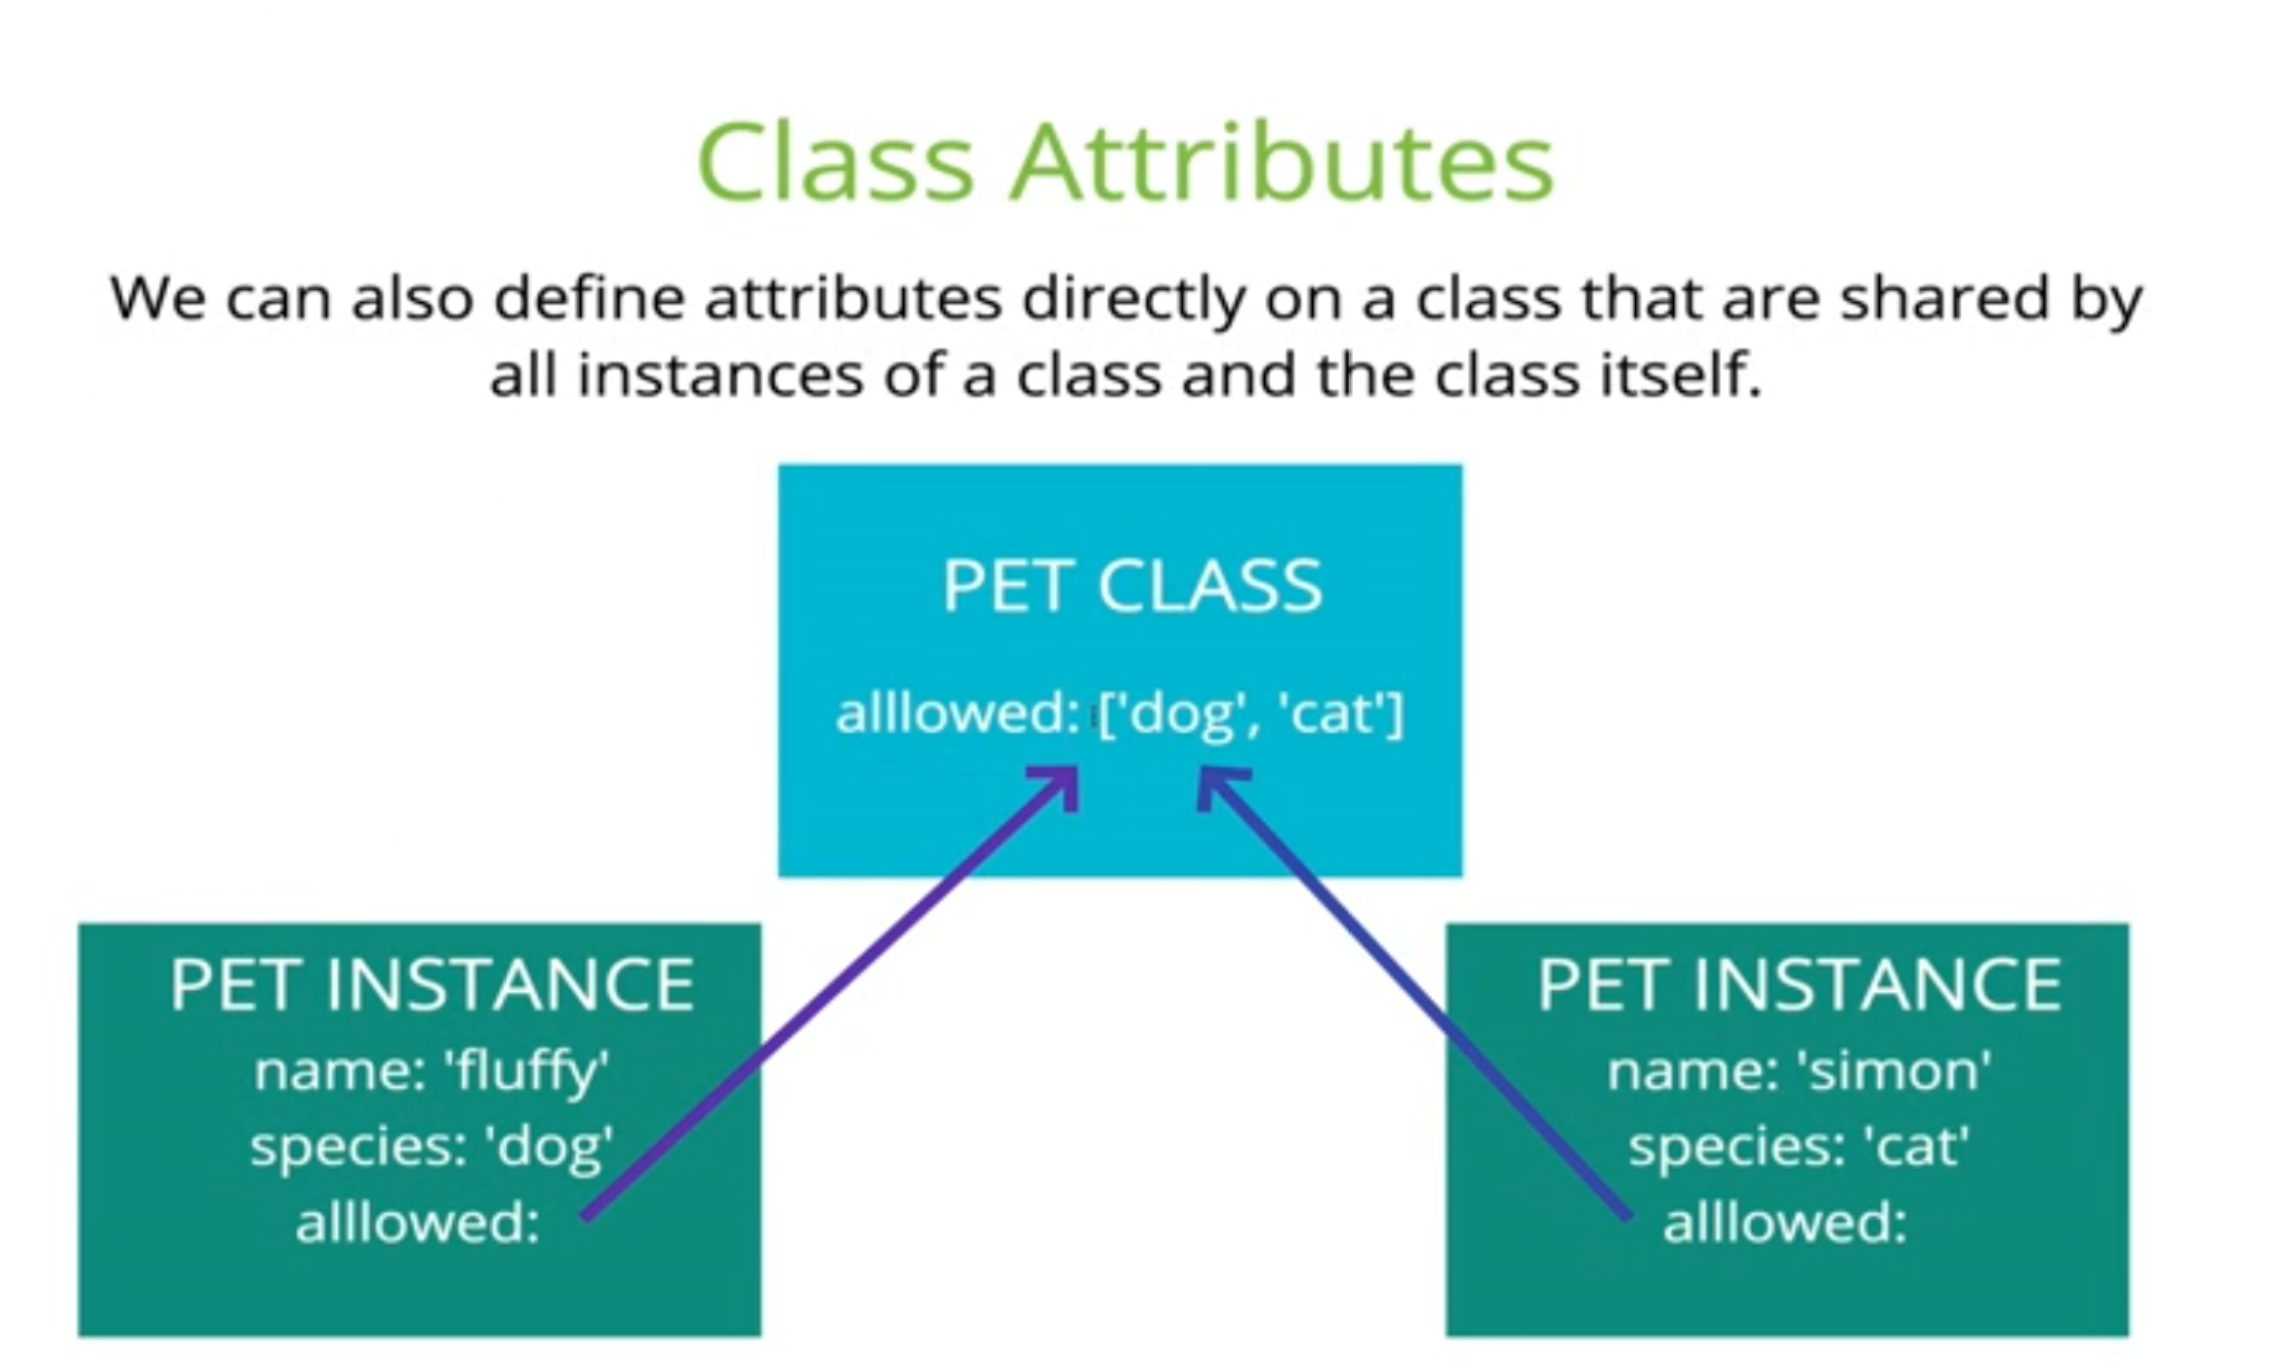

In [3]:
from IPython.display import Image
Image('img/class_attributes.PNG')

Let's take a look at using class attributes.
Below we will create a class attribute `past_visitors` which contains a list of names of people who have attended the club. If the user instantiates a `Club visitor` instance with a name which does not belong to this list, the program will throw an error.

In [16]:
class Club_visitor:
    past_visitors =["Marie", "Liz", "John","Ravi", "Delilah","Jack","Dave"]
    def __init__(self,name, gender, age=18):
        if name not in Club_visitor.past_visitors:
            raise ValueError(f"{name} is not in guest list")
        self.name = name
        self.age = age
        self.gender = gender
    
    @property
    def visitor(self):
        return f"Visitor {self.name} of sex {self.gender} and {self.age} of age"
    
    def __repr__(self):
        return f"Current club visitor is {self.visitor}"

Liz = Club_visitor('Liz','Female')
print(Liz)
Tim = Club_visitor('Tim','Male')


Current club visitor is Visitor Liz of sex Female and 18 of age


ValueError: Tim is not in guest list

##  Methods
A method is a function which does something. While attributes are properties of a class, a class may have several methods for carrying out different operations. 
### Instance Methods
This method takes `self` as argument, and can access class instance through self.
>We will create two instance methods for a class called Mail. The two methods simulate when you send and receive an email.


In [ ]:
class Mail:
    def __init__(self):
        self.inbox=0
        self.sent=0
    def send_mail(self, num=1):
        self.sent+=num
        print(f"Message sent! You have {self.sent} mails in Sent.")
    def receive_mail(self, num=1):
        self.inbox+=num
        print(f"New email! You have {self.inbox} emails.")
email1=Mail()
email1.send_mail()
email1.receive_mail(2)
# run the commands in comments
#print(email1.sent)
#email1.send_mail(3)
#print(email1.sent)

If you have learned `Java` programming before, you might be familiar with the concept of *setter* and *getter*. In Python, there is no explicit *getter* method, but there is one for *setter*.


In [103]:
class Mail:
    def __init__(self):
        self._inbox=0
        self._sent=0
        self._not_recommended_getter_var = 0
        
    @property
    def sent(self):
        return self._sent
    
    def not_recommended_getter(self):
        return self._not_recommended_getter_var
    
    def send_mail(self, num=1):
        self._sent+=num
        print(f"Message sent! You have {self.sent} mails in Sent.")
    def receive_mail(self, num=1):
        self._inbox+=num
        print(f"New email! You have {self._inbox} emails.")
  


**How do you think we should call `sent_email_count` ? Try it out.**

In [ ]:
### Write your code here ....

In [104]:
## You guessed it right! THe right syntax is:
a = Mail()
a.send_mail()
b = a.sent


Message sent! You have 1 mails in Sent.


 Another way would be to define a `getter` method just returning a value, but this is not recommended. 

**Can you think why?**

In [ ]:
# run this chunk
a.sent = 2
a.sent

**Run the following chunk above. What happens?**

You should have seen an error indicating that you cannot set an attribute.

In [105]:
## THe reason you shouldn't use the other way is that
a._not_recommended_getter_var = 3
a._not_recommended_getter_var

3

**So you see that although `not_recommended_getter_var` is a private variable, Python doesn't stop the user from modifying it. That's why you should always use the @property decorator when defining a getter method equivalent in Python**

### Setters and Getters

The proper way to define a setter is through a  `@method_name.setter decorator`.

[Read more about getters and setters](https://www.python-course.eu/python3_properties.php)

In [128]:
class Mail:
    def __init__(self):
        self.inbox=0
        self._sent=0
        self._not_recommended_getter_var = 0
        
    @property
    def inbox(self):
        return self._inbox
    
    @inbox.setter
    def inbox(self,val):
        if val >= 0:
            self._inbox = val
        else :
            print("Please set the inbox email count to a non-negative number!")
    
    def not_recommended_getter(self):
        return self._not_recommended_getter_var
    
    def send_mail(self, num=1):
        self._sent+=num
        print(f"Message sent! You have {self.sent} mails in Sent.")
    def receive_mail(self, num=1):
        self._inbox+=num
        print(f"New email! You have {self._inbox} emails.")
        




Please set the inbox email count to a non-negative number!


0

**Try to set the inbox email count to a negative number and see what happens**

In [131]:
### Write your code here ....


###  Class Methods
This method takes _cls_ as argument, and can change state of the class as a whole, not separately instance of a class. it uses _@classmethod_ decorator to define as classmethod.

### Static Methods
These methods donot take in _cls_ or _self_ as arguments and does not alter any state of the instance or the class. It uses _@staticmethod_ as a decorator and you can use it to do any operation independent of the particular class.

### Exercise : Find the implementation of the Mail class. The representation of the class doesn't properly work since the status of the Mail object is not updated. Give at least one way to correct the behaviour of the class.

In [6]:
class Mail:
    sent_amount = 0
    received_amount = 0
    
    def __init__(cls):
        print(cls)
     
    @staticmethod
    def send_mail_static(sent_amount=0):
        
        sent_amount += 1
        print(f"Message sent! You have {sent_amount} mails in Sent.")
        
    @staticmethod
    def receive_mail_static(received_amount=0):
        received_amount += 1
        print(f"New email! You have {received_amount} emails received")
        
    def __repr__(cls):
        return f"Current state is {cls.sent_amount} sent mails and {cls.received_amount} received mails"
        
Mail.receive_mail_static()
Mail()
print("Thats wrong obviously!")

New email! You have 1 emails received
Current state is 0 sent mails and 0 received mails
Thats wrong obviously!


### Example of Static Method Usage

In [31]:
class Calculator:
    def __init__(self):
        pass
    @staticmethod
    def multiply(x,y):
        return(x*y)
result= Calculator.multiply(4,5)
print(result)

20


## Different underscore representations and their meanings
Often with python OOP, you will encounter the following three underscore representations: 
- \_\_method1\_\_
- \_method2
- \_\_method3

###  \_\_method1\_\_ 
\_\_method1\_\_ is called a Dunder method/ Double Underscore/ magic method. They are predefined and although it is possible to create your own Dunder method, it is recommended not to create one. These allow you to implement some neat functionalities to your OOP structure. Some examples are \_\_init\_\_, \_\_del\_\_, \_\_repr\_\_. 
<br>The complete list of all Dunder methods are available in: __[Dunder_Methods_in_Python](https://docs.python.org/2/reference/datamodel.html#special-method-names)

**Other examples**

`print(f"the function name is {fun.__name__}")`

`print(f"The function docstring is {fun.__doc__}")`

<br>
<br> We have already seen the implementation for this as __init__ method to initialize a class. __del__ is used when you want to delete some instance of a class. 


Lets look at `__len__` and` __getitem__` methods.

[Read here](https://dbader.org/blog/python-dunder-methods)


## Mailbox with Dunder Methods Exercise

Implement a Mailbox that has the following properties:

* 1. init method setting inbox and sent variables to 0 and instantiates `emails` to empty dictionary
* 2. `send_mail` method that by default sends an email to Michael with  certain default value string (choose yourself). The method increases the sent email count by 1.
* 3. A Dunder method to print out the total amount of emails (received + sent)
* 4. A Dunder method to print out all the received emails in a dictionary format
* 5. A method to receive email. The method increases the inbox email count by one

##   \_method2
 \_method2 (single underscore name) is a conventional way of indicating that this is a private method. Functionally it is same as normal instance method. It is a way for developers to communicate that this function or attribute should not be modified by the user.



In [57]:
class Drink:
    def __init__(self,name,drinktype ):
        self._name = name
        self._type=drinktype
        
    def __repr__(self):
        return (f"This is a {self._name} drink.")
    
    @property
    def _drinktype(self):
         print(f'The drink type s {self._type}.')
            

d= Drink('Coca-Cola','soft drink')
print(d)
d._drinktype

This is a Coca-Cola drink.
The drink type s soft drink.


##  \_\_method3 
 \_\_method3 (double underscore name) is a method called name mangling. It is particularly useful when we learn about inheritance. Imagine there are two classes with same method/attribute name. It would be confusing for python to know which method/attribute you are referring to. This allows to tie a method/attribute to a particular class. Lets look at an example of how it is implemented.


In [66]:
class OscarParty:
    def __init__(self, name, profession):
        self.__nam=name
        self.profession=profession
    def __prof(self):
        return (f'{self.__nam}, {self.profession} by profession has just arrived to the Oscar.')
   
        
class GrammyParty:
    def __init__(self, name,num_songs):
        self.__nam=name        
        self.num_songs=num_songs
    
g1= OscarParty('Lady Gaga', 'singer/actress')
g2 = OscarParty('BradleyCooper', 'actor')

g3 = GrammyParty('Lady Gaga',65)
g4 = GrammyParty('Bob Dylan',85)

print(g1._OscarParty__nam)
print(g3._GrammyParty__nam)
print(g2._OscarParty__prof())

Lady Gaga
Lady Gaga
BradleyCooper, actor by profession has just arrived to the Oscar.


##  Inheritance
One of the most useful features of OOP is inheritance. It allows other classes to inherit attributes, methods from other classes also called base/parent class without explicitly defining them under inheriting class. Lets look at the following example. 
> We will create a base class Matter, and another class Liquid which inherits from this base class.

In [107]:
class Matter:
    def __init__(self,name,atoms_per_mol):
        self.name=name
        self.atom=atoms_per_mol
class Liquid (Matter):
    pass
H2O=Liquid('water', 3)
print(H2O.atom)
print(isinstance(H2O,Matter))
print(isinstance(H2O,Liquid))


3
True
True
True


The _isinstance_ command allows us to see if an instance belongs to the mentioned class. In this case, it shows that _H2O_ is an instance of both base class _Matter_ and inheriting class _Liquid_

In [110]:
print(f"True means that Liquid is a subclass of Matter : \n{issubclass(Liquid,Matter)}")


print(f"False means that Matter is not a subclass of Liquid : \n{issubclass(Matter,Liquid)}")


True means that Liquid is a subclass of Matter : 
True
False means that Matter is not a subclass of Liquid : 
False


Before we talked about the `@property` decorator.

> Let's say you have attributes which inherit from a parent attribute. Now when you change the parent attribute outside the class and you want the ones inheriting from the parent to be also inheriting the change automatically, the `@property` decorator comes in handy. 

The `@property` decorator on *method_name* is often followed by @method\_name.setter decorator. While @property decorator allows you to access a method as an attribute, this setter decorator helps you to achieve exactly what I explained above i.e. making sure that the inheriting attributes also change when source attribute is changed.
<br> Lets demonstrate this concept with the following block of code. We will create a class _VideoGame_ which takes attributes: user_name, user_age. We want to create the character name of the user as name_age. However, now if an existing user wants to change his character name, we want that the database also updates the base attributes user_name and user_age accordingly.

### Multiple Inheritance
In this section we demonstrate how a child class can inherit from more than one base class. We will also introduce the \_\_super\_\_ method. In the next example we will create two base classes _Liquid_ and _Movie_ and a child class _Art_ which will inherit all methods of both the classes. 
<br> Next we will look at the init methods to find out what \_\_super\_\_ is used for.



In [88]:
class Liquid:
    def __init__(self,name):
        print ("LIQUID init'd")
        self.name=name
    def boiling(self,temp):
        self.temp=temp
        print(f'{self.name} is boiling at {self.temp} degree Celsius')
        
    
class Solid:
    def __init__(self,name):
        print ("SOLID init'd")
        self.name=name
    def melting(self,temp):
        self.temp=temp
        print(f'{self.name} is melting at {self.temp} degree Celsius')
    
class Water(Liquid, Solid):
    def __init__(self,name):
        print ("WATER init'd")
        super().__init__(name=name)
        
coke = Liquid('lemonade')
calcium = Solid ('calcium')


LIQUID init'd
SOLID init'd


Lets now create an instance of Water and see which init gets called.

In [89]:
ice_water = Water('ice water')


WATER init'd
LIQUID init'd


In the above example we see when we create an instance of Water with `__super__` method, it inits with the Water class, and Liquid class, but not with solid class. Lets see if it inherits the methods from both classes and if ice_water is an instance of both parent classes

In [90]:
ice_water.boiling(100)
ice_water.melting(0)

print(isinstance(ice_water,Water))
print(isinstance(ice_water,Solid))
print(isinstance(ice_water,Liquid))

ice water is boiling at 100 degree Celsius
ice water is melting at 0 degree Celsius
True
True
True


So we see ice_water is an instance of both the parent classes and the child class Water. Also although ice_water inherits the methods from both the parent classes, it inits only _Liquid_ class. This order of init is explained in the next example where we talk about MRO or Method Resolution Order. 
<br> Let us run the previous example but with the position of base classes switched and then look at which is init'd

In [91]:
class Liquid:
    def __init__(self,name):
        print ("LIQUID init'd")
        self.name=name
    def boiling(self,temp):
        self.temp=temp
        print(f'{self.name} is boiling at {self.temp} degree Celsius')
        
    
class Solid:
    def __init__(self,name):
        print ("SOLID init'd")
        self.name=name
    def melting(self,temp):
        self.temp=temp
        print(f'{self.name} is melting at {self.temp} degree Celsius')
    
class Water(Solid, Liquid):
    def __init__(self,name):
        print ("WATER init'd")
        super().__init__(name=name)
        
ice_water = Water('ice water')

WATER init'd
SOLID init'd


Aha! Now the SOLID is init'd not Liquid! Lets look behind the scenes of python about what is init'd in which order.

## MRO 
Explained simply, MRO is the way in which python determines the order in which the methods are resolved in case of multiple inheritance. Lets say both the parent classes have same method names, and we call the child with this method name. How does python figure out which method to execute? There is a complex algorithm which is used to order this sequence. For us, it is important to know that we can use `__mro__` attribute, mro() method or help(cls) on the class to understand the order in which python will look for the methods of an instance. 

In [101]:
class One:
    def __init__(self):
        print("ONE is init'd")
class Two(One):
    def __init__(self):
        print("TWO is init'd")
class Three( One):
    def __init__(self):
        print("Three is init'd")
class Four(Three,Two):
    def __init__(self):
        print("Four is init'd")
        
number=Four()
print(Four.__mro__)
print(Four.mro())
help(Four)

Four is init'd
(<class '__main__.Four'>, <class '__main__.Three'>, <class '__main__.Two'>, <class '__main__.One'>, <class 'object'>)
[<class '__main__.Four'>, <class '__main__.Three'>, <class '__main__.Two'>, <class '__main__.One'>, <class 'object'>]
Help on class Four in module __main__:

class Four(Three, Two)
 |  Method resolution order:
 |      Four
 |      Three
 |      Two
 |      One
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors inherited from One:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



So we see the order in which python looks for a method in case of multiple inheritance. Note that the above example is shown with the \_\_init\_\_ method, but mro is valid for any method. As a rule of thumb, it is important to remember the order is set by the positional order in which we input the parent classes as arguments while creating the child class. 

## Super()
So now that we have an understanding of what MRO is, lets look at how super uses this concept. In essence, super binds a the parent class \_\_init\_\_ to the child class that follows it in the mro. This is useful for coordinated multiple inheritance such that if we inject new base class later, your child class will inherit in correct manner. This helps subclasses to use new classes.
For more information on _super()_, follow this very helpful post:
__[Super_Explained_in_Python](https://stackoverflow.com/questions/222877/what-does-super-do-in-python/33469090#33469090)__


In [10]:
class One:
    def action(self):
        print("Calling Action in ONE.")
class Two(One):
    def action(self):
        print("Calling Action in TWO.")
class Three( One):
    def action(self):
        print("Calling Action in THREE.")
class Four(Three,Two):
    def action(self):
        print("Calling Action in FOUR.")
        super().action()
        
number=Four()
number.action()
help(Four)

Calling Action in FOUR.
Calling Action in THREE.
Help on class Four in module __main__:

class Four(Three, Two)
 |  Method resolution order:
 |      Four
 |      Three
 |      Two
 |      One
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  action(self)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors inherited from One:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



When super() is added to class Four, it immediately follows the parent following it in mro. If this parent is bound to another parent by super(), then this can be seen as well and if this parent has another super, so on it follows. Lets demonstrate this. <br> This time we will inject a new base class _zero_ before class _ine_ and link up all the child classes with super, so that when we look at the mro of the last grandchild we will see it also appears in the order of its inheritance

In [11]:
class Zero:
    def action(self):
        print("Method in Zero called")
        
class One(Zero):
    def action(self):
        print("Method in ONE called")
        super().action()
        
class Two(One):
    def action(self):
        print("Method in TWO called")
        super().action()
        
class Three( One):
    def action(self):
        print("Method in THREE called")
        super().action()
        
class Four(Three,Two):
    def action(self):
        print("Method in FOUR called")
        super().action()
        
number=Four()
number.action()
help(Four)

Method in FOUR called
Method in THREE called
Method in TWO called
Method in ONE called
Method in Zero called
Help on class Four in module __main__:

class Four(Three, Two)
 |  Method resolution order:
 |      Four
 |      Three
 |      Two
 |      One
 |      Zero
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  action(self)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors inherited from Zero:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



#  \*args and \**kwargs
You will often come across these two terms when dealing with functions in Python, specially in OOP. These terms are used in place of arguments while writing a function. Example: some_function(\*args, \**kwargs)
<br> The main use of these two terms is to pass arguments having variable lengths. 
## \*args
This is used to pass a list of arguments which are __not keyworded__ like in a dictionary, having variable length. To elaborate,lets look at an example of a function called guest_list which makes a nice directory of guests arriving at the party. Whilst writing this function you may not be still aware of the number of guests coming to the party. In this case we can pass *arg to specify a list of variables whose length is unknown. 

In [114]:
def guest_list(*args):
    for i,guest in enumerate(args):
        print (f"Guest{i+1}: ",guest)
args=["Tiina", "Merja", "Krittika"]
guest_list(*args)

Guest1:  Tiina
Guest2:  Merja
Guest3:  Krittika


## \**kwargs
This is used to pass a list of __keyworded__ arguments having variable length. Lets run the above example to explain kwargs. But this time, in addition to guest list of names, we will also add their relationship to the party host. 

In [120]:
def guest_list(**kwargs):
    for guest, relation in kwargs.items():
        print (f"Guest: {guest}, relation to the host: {relation}")
kwargs={"Pam": "sister", "Linda": "wife", "Tim": "brother"}
guest_list(**kwargs)

Guest: Pam, relation to the host: sister
Guest: Linda, relation to the host: wife
Guest: Tim, relation to the host: brother


Lets look at another very useful usage of this form of function creating using \*arg and \**kwargs

In [125]:
def kwarg_arg_use(arg1, arg2, arg3):
    print(f"Value of argument1: {arg1}")
    print(f"Value of argument2: {arg2}")
    print(f"Value of argument3: {arg3}")
        
using_arg=["one", 2, "11"]
kwarg_arg_use(*using_arg)

Value of argument1: one
Value of argument2: 2
Value of argument3: 11


In [127]:
using_kwarg ={"arg1":"three","arg2": 2, "arg3": "1"}
kwarg_arg_use(**using_kwarg)

Value of argument1: three
Value of argument2: 2
Value of argument3: 1


**Note : args and kwargs -- UNPACKING OPERATORS -- have to be passed in a certain order. In Python, the argument order is the following:**
> 1. Positional Arguments (or arguments without default values)
> 2. Keyword arguments (or named arguments)
> 3. args
> 4. kwargs

# OOP Related Data Structure : Namedtuple
[From namedtuple in Python3](https://docs.python.org/3/library/collections.html#collections.namedtuple)

> collections.namedtuple(typename, field_names[, verbose=False][, rename=False])
Returns a new tuple subclass named typename. The new subclass is used to create tuple-like objects that have fields accessible by attribute lookup as well as being indexable and iterable. Instances of the subclass also have a helpful docstring (with typename and field_names) and a helpful __repr__() method which lists the tuple contents in a name=value format.

> The field_names are a sequence of strings such as ['x', 'y']. Alternatively, field_names can be a single string with each fieldname separated by whitespace and/or commas, for example 'x y' or 'x, y'.

> Any valid Python identifier may be used for a fieldname except for names starting with an underscore. Valid identifiers consist of letters, digits, and underscores but do not start with a digit or underscore and cannot be a keyword such as class, for, return, global, pass, print, or raise.

>If rename is true, invalid fieldnames are automatically replaced with positional names. For example, ['abc', 'def', 'ghi', 'abc'] is converted to ['abc', '_1', 'ghi', '_3'], eliminating the keyword def and the duplicate fieldname abc.

>If verbose is true, the class definition is printed just before being built.

> Named tuple instances do not have per-instance dictionaries, so they are lightweight and require no more memory than regular tuples.